# physical setup


## basic  setup

In [1]:
%matplotlib inline
from jetset.jet_model import Jet
my_jet=Jet(name='test',electron_distribution='lppl',)

In [2]:
Jet.available_electron_distributions()

lp: log-parabola
pl: powerlaw
lppl: log-parabola with low-energy powerlaw branch
lpep: log-parabola defined by peak energy
plc: powerlaw with cut-off
bkn: broken powerlaw
spitkov: spitkov
lppl_pile_up: log-parabola with low-energy powerlaw branch and pile-up
bkn_pile_up: broken powerlaw and pileup


In [4]:
my_jet.show_pars()

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 B                | magnetic_field       | G                | +1.000000e-01 | [+0.000000e+00,No           ] | False 
 N                | electron_density     | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ] | False 
 R                | region_size          | cm               | +1.569897e+01 | [+0.000000e+00,+3.000000e+01] | True 
 beam_obj         | beaming              |                  | +1.000000e+01 | [+1.000000e+00,No           ] | False 
 gamma0_log_parab | turn-over-energy     | Lorentz-factor   | +1.000000e+04 | [+1.000000e+00,+1.000000e+08] | False 
 gmax             | high-energy-cut-off  | Lorentz-f

In [3]:
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: test  

electron distribution:
 type: lppl  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-----------

## setting the parameters

In [5]:
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=14.5)
my_jet.set_par('N',val=1E3)

In [6]:
my_jet.parameters.B.val=0.2
my_jet.parameters.r.val=0.4

## investigating the electron distribution

In [7]:
my_jet.show_electron_distribution()

-------------------------------------------------------------------------------------------------------------------
electron distribution:
 type: lppl  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 N                | electron_density     | cm^-3            | +1.000000e+03 | [+0.000000e+00,No           ] | False 
 gamma0_log_parab | turn-over-energy     | Lorentz-factor   | +5.000000e+03 | [+1.000000e+00,+1.000000e+08] | False 
 gmax             | high-energy-cut-off  | Lorentz-factor   | +1.000000e+08 | [+1.000000e+00,+1.000000e+15] | False 
 gmin             | low-energy-cut-off   | Lo

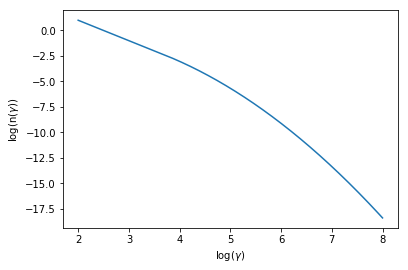

In [8]:
p=my_jet.electron_distribution.plot()

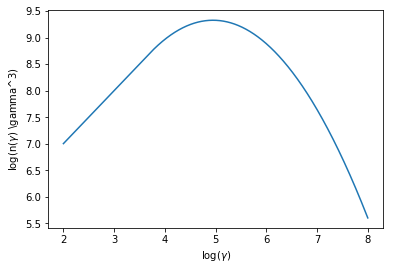

In [9]:
p=my_jet.electron_distribution.plot3p()

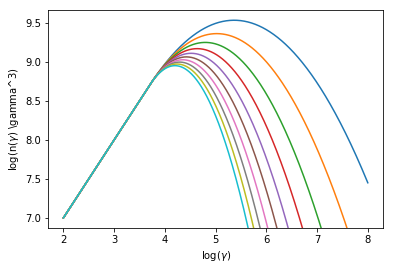

In [10]:
import numpy as np
p=None
for r in np.linspace(0.3,1,10):
    my_jet.parameters.r.val=r
    if p is None:
        p=my_jet.electron_distribution.plot3p()
    else:
        p=my_jet.electron_distribution.plot3p(p)

###  using log values for electron distribution parameters

In [11]:
my_jet=Jet(name='test',electron_distribution='lppl',electron_distribution_log_values=True)
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: test  

electron distribution:
 type: lppl  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-----------

## evaluate and plot  the model


At this point we can evaluate the  emission for this jet model using the instruction

In [12]:
my_jet.eval()

In [13]:
my_jet.show_pars()

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 B                | magnetic_field       | G                | +1.000000e-01 | [+0.000000e+00,No           ] | False 
 N                | electron_density     | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ] | False 
 R                | region_size          | cm               | +1.569897e+01 | [+0.000000e+00,+3.000000e+01] | True 
 beam_obj         | beaming              |                  | +1.000000e+01 | [+1.000000e+00,No           ] | False 
 gamma0_log_parab | turn-over-energy     | Lorentz-factor   | +4.000000e+00 | [+0.000000e+00,+8.000000e+00] | True 
 gmax             | high-energy-cut-off  | Lorentz-fa

and plot the corresponding SED:


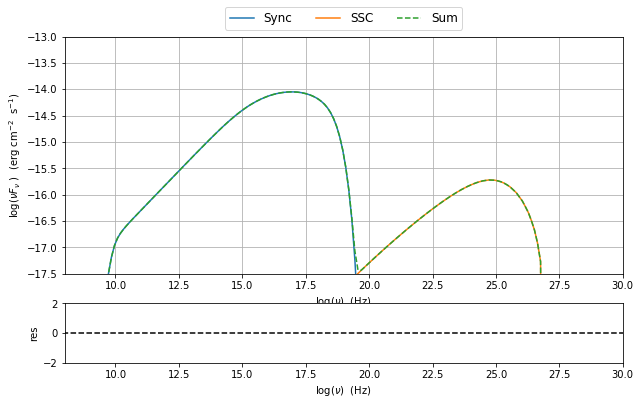

In [14]:
from jetset.plot_sedfit import PlotSED
my_plot=PlotSED()
my_jet.plot_model(plot_obj=my_plot)
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

alternatively, you can call the ``plot_model`` method without passing a ``Plot`` object

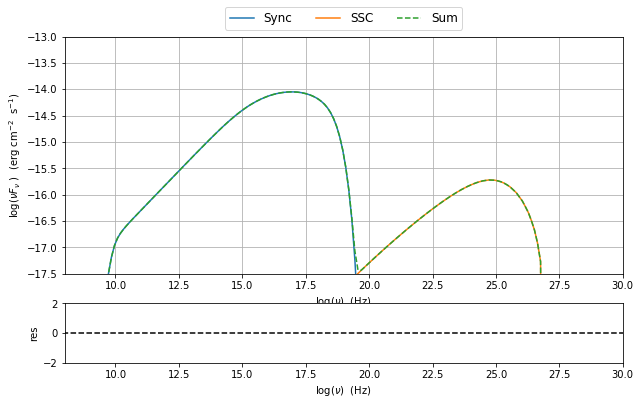

In [15]:
my_plot=my_jet.plot_model()
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

the ``my_plot`` object returned will be built on the fly by the  ``plot_model`` method

## comparing models on the same plot

to compare the same model after changing a parameter

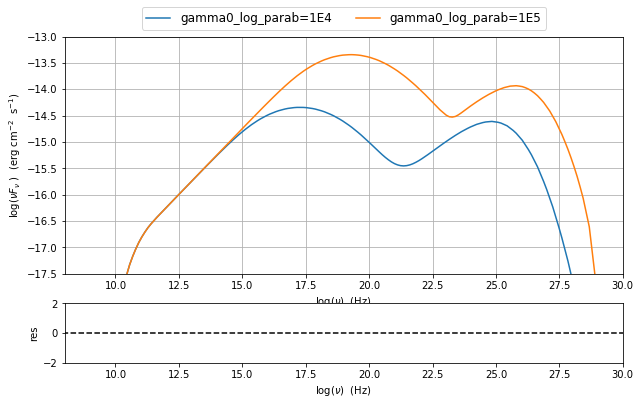

In [19]:
my_jet=Jet(name='test',electron_distribution='lppl',)
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=14.5)
my_jet.set_par('N',val=1E3)

my_jet.parameters.gamma0_log_parab.val=1E4
my_jet.eval()
my_plot=my_jet.plot_model(label='gamma0_log_parab=1E4',comp='Sum')
my_jet.set_par('gamma0_log_parab',val=1.0E5)
my_jet.eval()
my_plot=my_jet.plot_model(my_plot,label='gamma0_log_parab=1E5',comp='Sum')
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

## saving a plot

to save the plot

In [20]:
my_plot.save('jet1.png')

## saving and lodaing  a model

In [21]:
my_jet.save_model('test_model.dat')

In [22]:
my_jet_new=Jet.load_model('test_model.dat')

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 B                | magnetic_field       | G                | +1.000000e-01 | [+0.000000e+00,No           ] | False 
 N                | electron_density     | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ] | False 
 R                | region_size          | cm               | +1.569897e+01 | [+0.000000e+00,+3.000000e+01] | True 
 beam_obj         | beaming              |                  | +1.000000e+01 | [+1.000000e+00,No           ] | False 
 gamma0_log_parab | turn-over-energy     | Lorentz-factor   | +1.000000e+04 | [+1.000000e+00,+1.000000e+08] | False 
 gmax             | high-energy-cut-off  | Lorentz-f

## switching on/off the particle distribution normalization

In [23]:
my_jet.Norm_distr

1

In [24]:
my_jet.switch_Norm_distr_OFF()

In [25]:
my_jet.switch_Norm_distr_ON()

## setting the particle density  from observed Fluxes or Luminosities

In [26]:
my_jet=Jet(name='test',electron_distribution='lppl')

this is the initial value of N

In [27]:
my_jet.parameters.N.val

100.0

In [28]:

my_jet.set_N_from_nuFnu(nuFnu_obs=1E-14,nu_obs=1E15)

This is the updated value of ``N``, obtained in order to match the given flux at the given frequency

In [29]:
my_jet.get_par_by_name('N').val

249.04461454958587

In [30]:
my_jet.parameters.show_pars()

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 N                | electron_density     | cm^-3            | +2.490446e+02 | [+0.000000e+00,No           ] | False 
 gmin             | low-energy-cut-off   | Lorentz-factor   | +2.000000e+00 | [+1.000000e+00,+1.000000e+05] | False 
 gmax             | high-energy-cut-off  | Lorentz-factor   | +1.000000e+06 | [+1.000000e+00,+1.000000e+15] | False 
 s                | LE_spectral_slope    |                  | +2.000000e+00 | [-1.000000e+01,+1.000000e+01] | False 
 r                | spectral_curvature   |                  | +4.000000e-01 | [-1.500000e+01,+1.500000e+01] | False 
 gamma0_log_parab | turn-over-energy     | Lorentz-

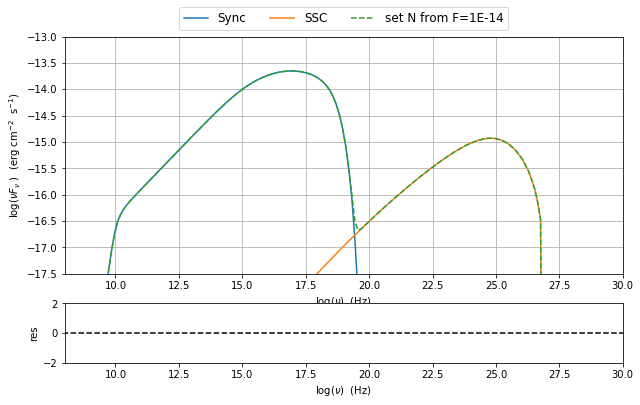

In [31]:
my_jet.eval()
my_plot=my_jet.plot_model(label='set N from F=1E-14')
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

In [32]:
my_jet.set_N_from_nuLnu(L_0=1E43,nu_0=1E15)

In [33]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')

In [34]:
my_jet.parameters.show_pars()

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 N                | electron_density     | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ] | False 
 gmin             | low-energy-cut-off   | Lorentz-factor   | +2.000000e+00 | [+1.000000e+00,+1.000000e+05] | False 
 gmax             | high-energy-cut-off  | Lorentz-factor   | +1.000000e+06 | [+1.000000e+00,+1.000000e+15] | False 
 s                | LE_spectral_slope    |                  | +2.000000e+00 | [-1.000000e+01,+1.000000e+01] | False 
 r                | spectral_curvature   |                  | +4.000000e-01 | [-1.500000e+01,+1.500000e+01] | False 
 gamma0_log_parab | turn-over-energy     | Lorentz-

In [35]:
my_jet.get_beaming()

19.943844732554165

In [36]:
my_jet.set_par('theta',val=10.)

In [37]:
my_jet.get_beaming()

4.968041140891955

of course setting `beaming_expr=delta` we get the same beaming expression as in the default case

In [38]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='delta')

In [39]:
my_jet.parameters.show_pars()

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 N                | electron_density     | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ] | False 
 gmin             | low-energy-cut-off   | Lorentz-factor   | +2.000000e+00 | [+1.000000e+00,+1.000000e+05] | False 
 gmax             | high-energy-cut-off  | Lorentz-factor   | +1.000000e+06 | [+1.000000e+00,+1.000000e+15] | False 
 s                | LE_spectral_slope    |                  | +2.000000e+00 | [-1.000000e+01,+1.000000e+01] | False 
 r                | spectral_curvature   |                  | +4.000000e-01 | [-1.500000e+01,+1.500000e+01] | False 
 gamma0_log_parab | turn-over-energy     | Lorentz-

## accessing individual spectral components

It is possible to access specific spectral components of our model

In [40]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')
my_jet.eval()

In [41]:

my_jet.list_spectral_components()

Sum
Sync
SSC


the on-screen message is telling us which components have been evaluated. 

In [42]:
Sync=my_jet.get_spectral_component_by_name('Sync')

OR

In [43]:
Sync=my_jet.spectral_components.Sync

and from the ``SED`` object we can extract both the nu and nuFnu array

In [44]:
nu_sync=Sync.SED.nu
nuFnu_sync=Sync.SED.nuFnu

In [45]:
print (nuFnu_sync[::10])

[1.00000000e-120 1.00000000e-120 1.18346083e-022 1.87412089e-018
 4.45026043e-016 1.78624983e-015 7.07667943e-015 2.69215529e-014
 7.95326288e-014 1.35642311e-013 1.22398936e-013 1.54978292e-014
 4.52069023e-028 1.00000000e-120 1.00000000e-120 1.00000000e-120
 1.00000000e-120 1.00000000e-120 1.00000000e-120 1.00000000e-120]


## External Compton


### Broad Line Region


In [46]:
my_jet=Jet(name='BLR example',electron_distribution='bkn')
my_jet.add_EC_component('EC_BLR')
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: BLR example  

electron distribution:
 type: bkn  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:EC_BLR, state: on
   name:Disk, state: on

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value  

In [47]:
my_jet.set_par('L_Disk',val=1E46)
my_jet.set_par('gmax',val=1E5)
my_jet.set_par('gmin',val=2.)

my_jet.set_par('p',val=1.5)
my_jet.set_par('p_1',val=3.5)
my_jet.set_par('R',val=15.5)
my_jet.set_par('B',val=1.0)
my_jet.set_par('z_cosm',val=0.6)
my_jet.set_par('beam_obj',val=25)
my_jet.set_par('gamma_break',val=5E2)
my_jet.set_N_from_nuLnu(nu_0=1E14,L_0=1E45)

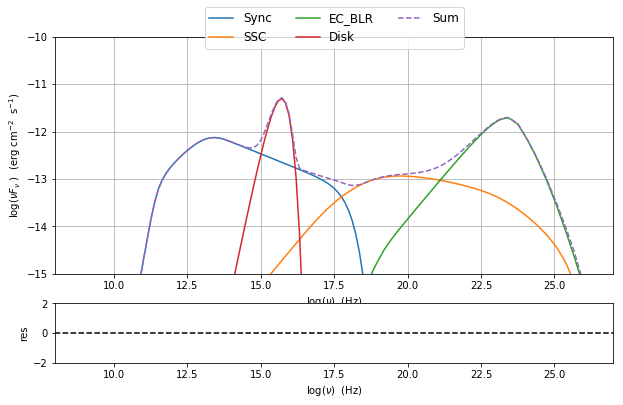

In [48]:
my_jet.eval()
p=my_jet.plot_model()
p.rescale(y_min=-15,y_max=-10,x_min=8,x_max=27)

### Dusty Torus

In [49]:
my_jet.add_EC_component('DT')
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: BLR example  

electron distribution:
 type: bkn  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+05

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:EC_BLR, state: on
   name:Disk, state: on
   name:DT, state: on

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Unit

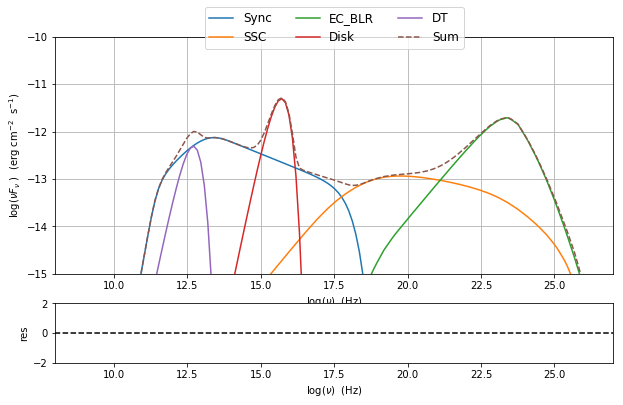

In [50]:
my_jet.eval()
p=my_jet.plot_model()
p.rescale(y_min=-15,y_max=-10,x_min=8,x_max=27)

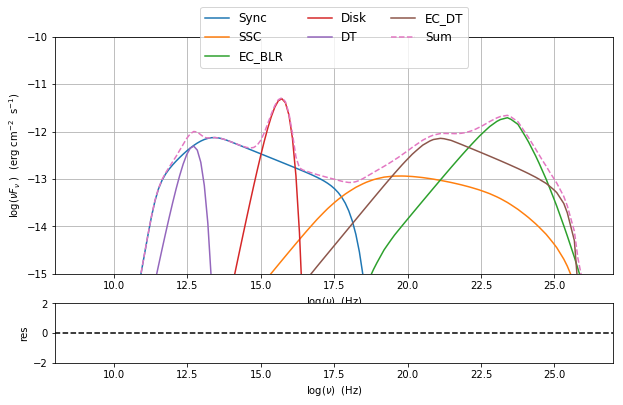

In [51]:
my_jet.add_EC_component('EC_DT')
my_jet.eval()
p=my_jet.plot_model()
p.rescale(y_min=-15,y_max=-10,x_min=8,x_max=27)